# PROBLEM STATEMENTS

In [1]:
# Customer Analysis and EDA
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Machine Learning
## Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## ML Models Different Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df=pd.read_csv("telecom_churn.csv")
df.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
df.describe()

Churn  AccountWeeks  ContractRenewal     DataPlan    DataUsage  \
count  3333.000000   3333.000000      3333.000000  3333.000000  3333.000000   
mean      0.144914    101.064806         0.903090     0.276628     0.816475   
std       0.352067     39.822106         0.295879     0.447398     1.272668   
min       0.000000      1.000000         0.000000     0.000000     0.000000   
25%       0.000000     74.000000         1.000000     0.000000     0.000000   
50%       0.000000    101.000000         1.000000     0.000000     0.000000   
75%       0.000000    127.000000         1.000000     1.000000     1.780000   
max       1.000000    243.000000         1.000000     1.000000     5.400000   

       CustServCalls      DayMins     DayCalls  MonthlyCharge   OverageFee  \
count    3333.000000  3333.000000  3333.000000    3333.000000  3333.000000   
mean        1.562856   179.775098   100.435644      56.305161    10.051488   
std         1.315491    54.467389    20.069084      16.426032     2.535712   
min         0.000000     0.000000     0.000000      14.000000     0.000000   
25%         1.000000   143.700000    87.000000      45.000000     8.330000   
50%         1.000000   179.400000   101.000000      53.500000    10.070000   
75%         2.000000   216.400000   114.000000      66.200000    11.770000   
max         9.000000   350.800000   165.000000     111.300000    18.190000   

          RoamMins  
count  3333.000000  
mean     10.237294  
std       2.791840  
min       0.000000  
25%       8.500000  
50%      10.300000  
75%      12.100000  
max      20.000000

In [5]:
df.isnull().sum()

# checking null values
# number of values is missing

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
df.nunique()

#Checking for unique values in our data to understand different values

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

In [7]:
('Number of rows: ', df.shape[0])

# In this we see how many rows are there in dataset

('Number of rows: ', 3333)

In [8]:
"nNumber of features:", df.shape[1]

# In this we see how many columns are there in dataset

('nNumber of features:', 11)

In [9]:
df.columns.tolist()

# In this we see all the columns in list type 
# There are two types of method to check this column in list type

# this is a 1st method

['Churn',
 'AccountWeeks',
 'ContractRenewal',
 'DataPlan',
 'DataUsage',
 'CustServCalls',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [10]:
print("nData Features:")
print(df.columns.tolist())

# this is a 2nd method

nData Features:
['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']


# CUSTOMER ANALYSIS

array([[<AxesSubplot:title={'center':'Churn'}>,
        <AxesSubplot:title={'center':'AccountWeeks'}>,
        <AxesSubplot:title={'center':'ContractRenewal'}>],
       [<AxesSubplot:title={'center':'DataPlan'}>,
        <AxesSubplot:title={'center':'DataUsage'}>,
        <AxesSubplot:title={'center':'CustServCalls'}>],
       [<AxesSubplot:title={'center':'DayMins'}>,
        <AxesSubplot:title={'center':'DayCalls'}>,
        <AxesSubplot:title={'center':'MonthlyCharge'}>],
       [<AxesSubplot:title={'center':'OverageFee'}>,
        <AxesSubplot:title={'center':'RoamMins'}>, <AxesSubplot:>]],
      dtype=object)

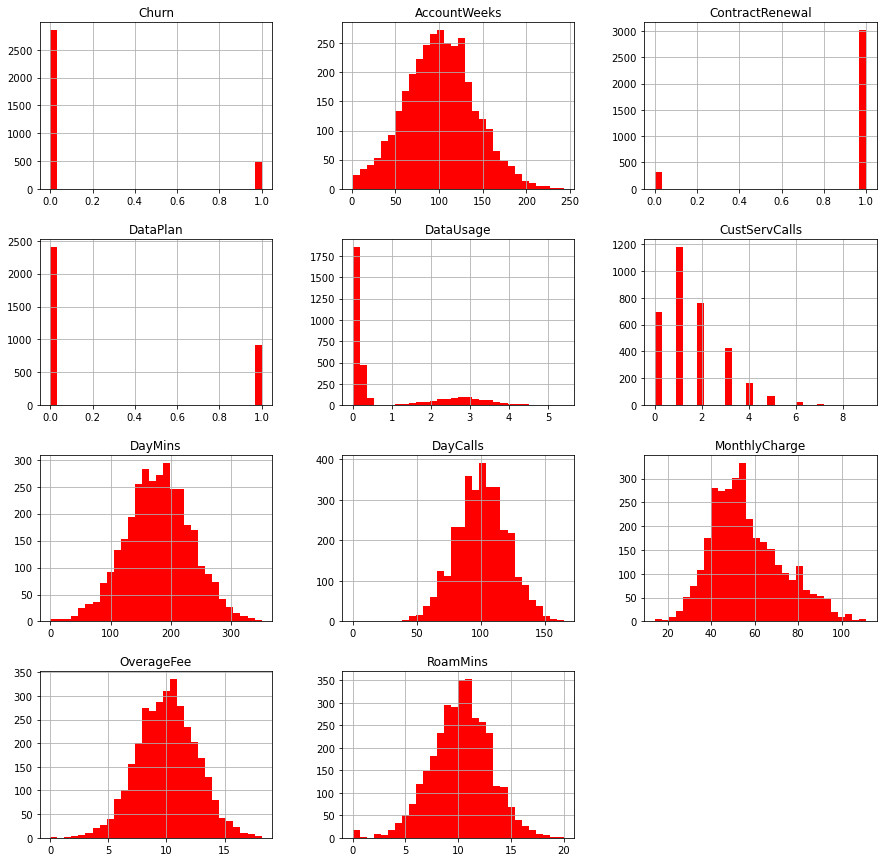

In [11]:
df.hist(figsize=(15,15), bins=30, color='RED')

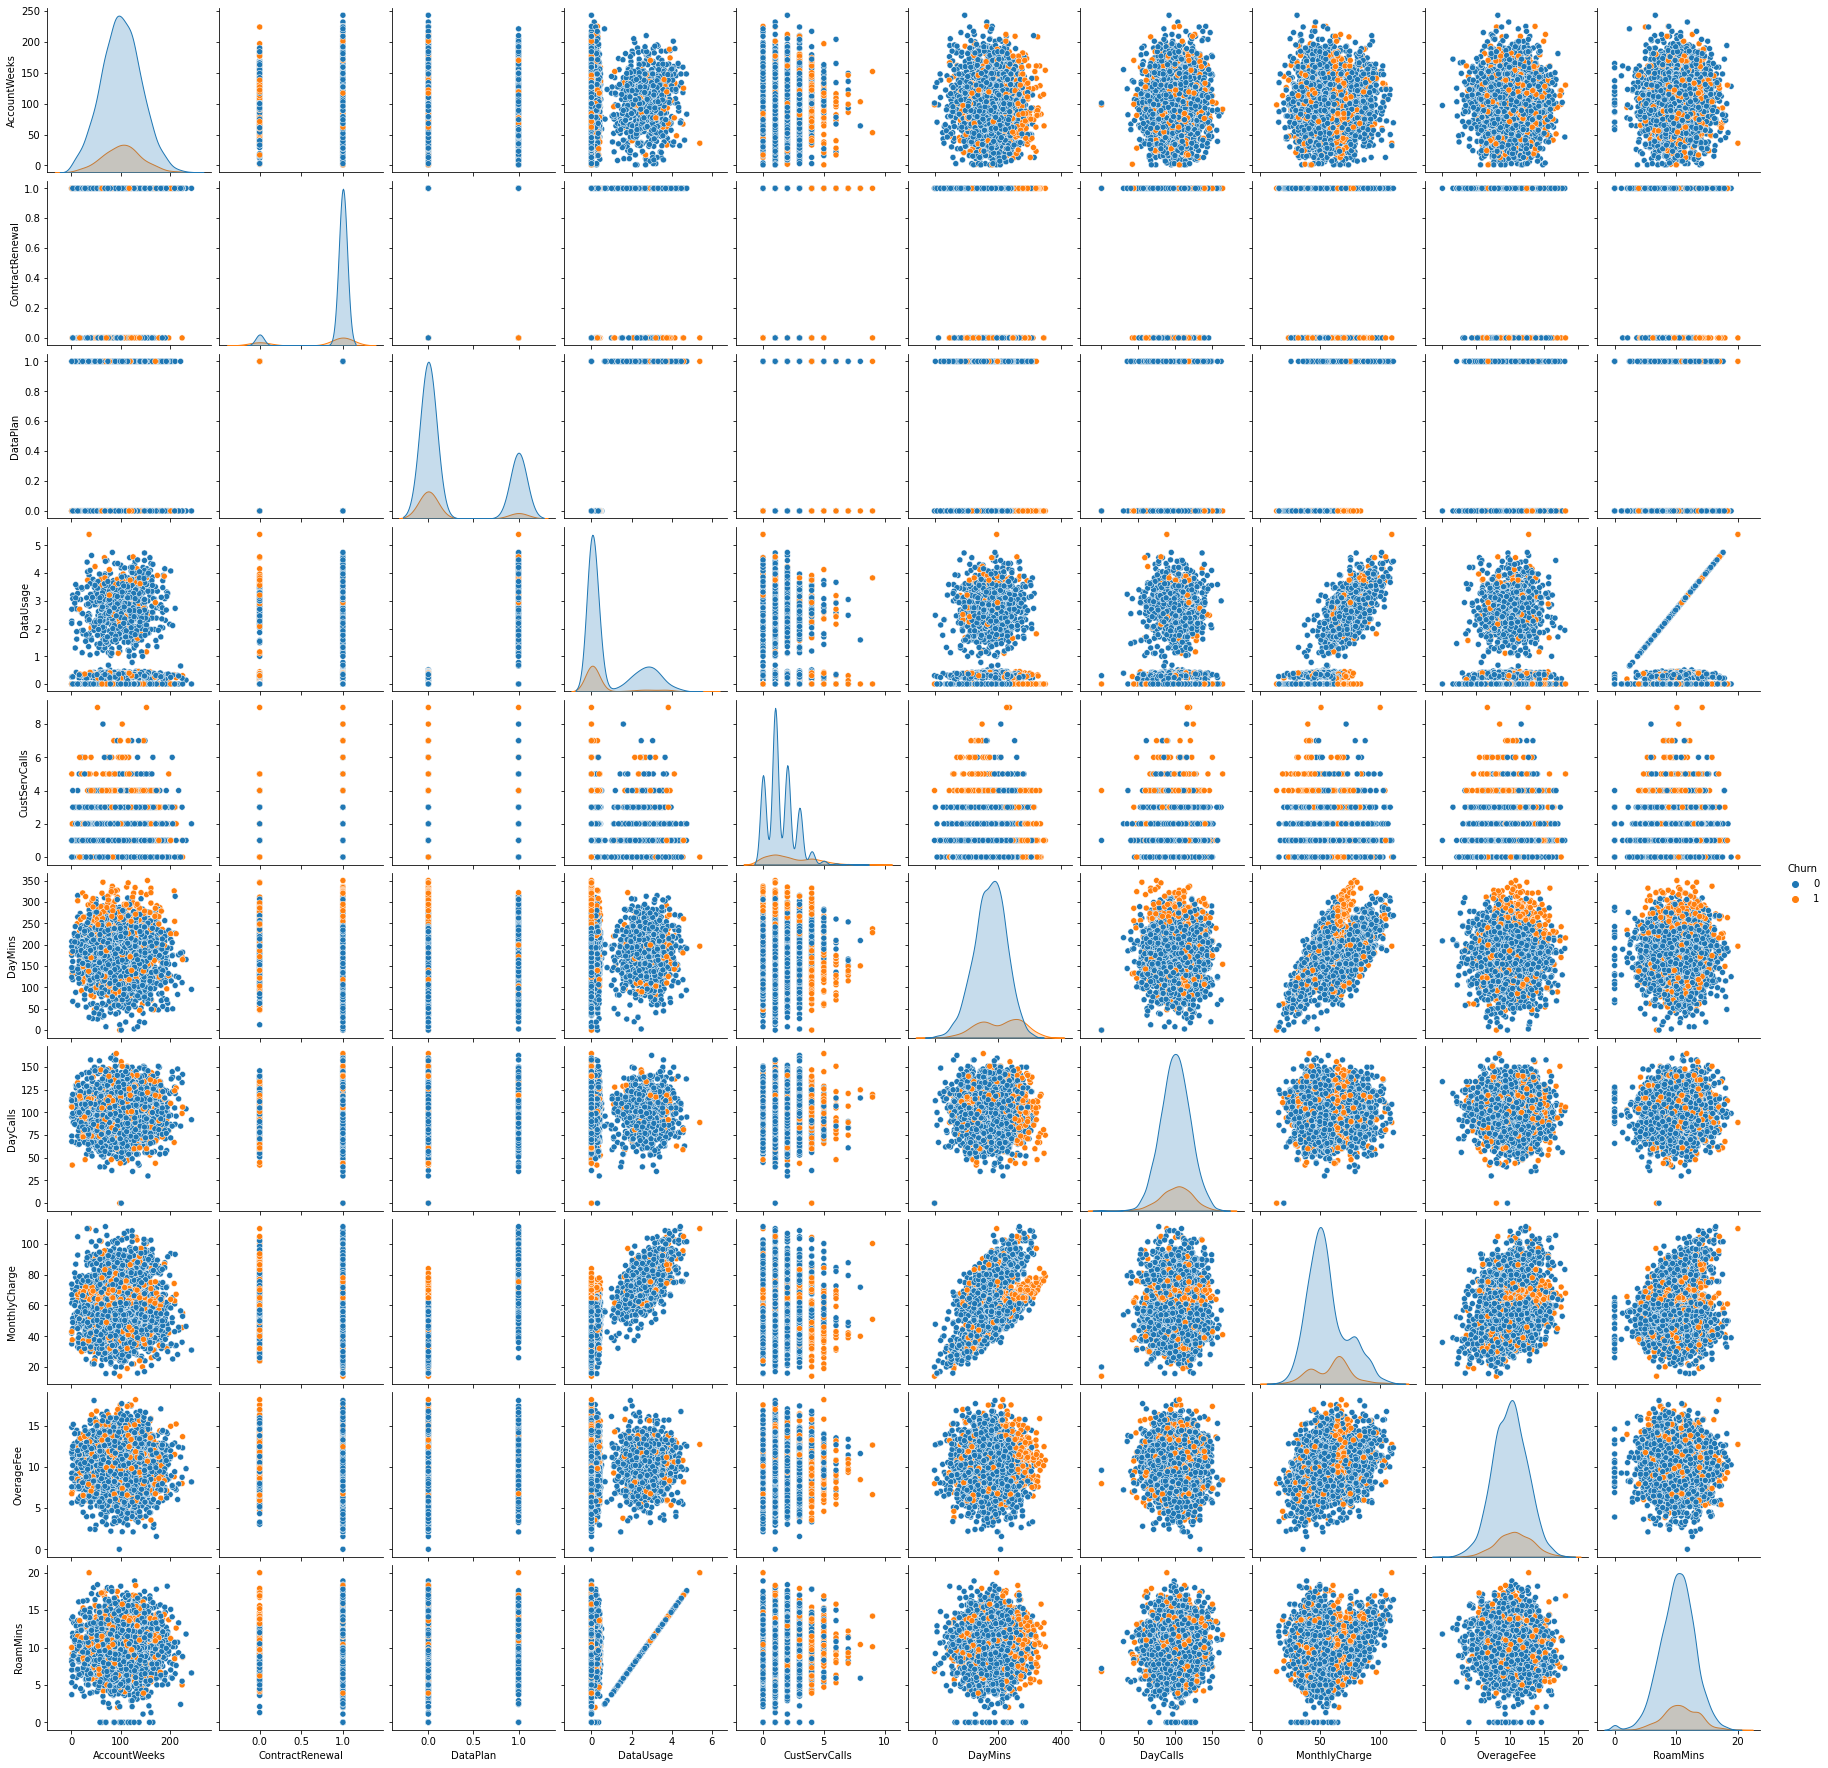

In [12]:
sns.pairplot(df, hue="Churn")

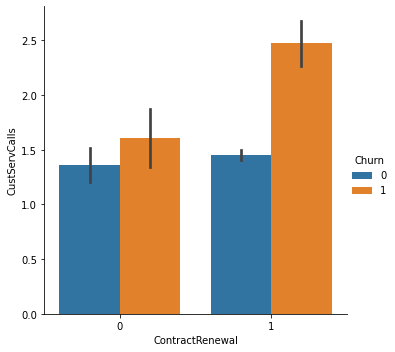

In [13]:
sns.catplot(x="ContractRenewal", y="CustServCalls", hue="Churn", kind="bar", data=df)


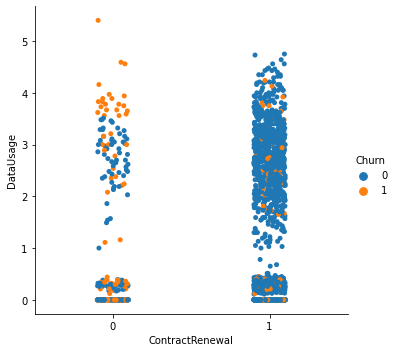

In [14]:
sns.catplot(x="ContractRenewal", y="DataUsage", hue="Churn", data=df)

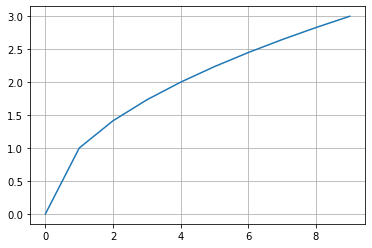

In [15]:
x=np.arange(10)
y=np.sqrt(x)
sns.lineplot(x,y)
plt.grid(True)
plt.show()

# line plot 

In [16]:
df

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
...     ...           ...              ...       ...        ...   
3328      0           192                1         1       2.67   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
...             ...      ...       ...            ...         ...       ...  
3328              2    156.2        77           71.7       10.78       9.9  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  
3332              0    234.4       113          100.0       13.30      13.7  

[3333 rows x 11 columns]

<AxesSubplot:ylabel='ContractRenewal'>

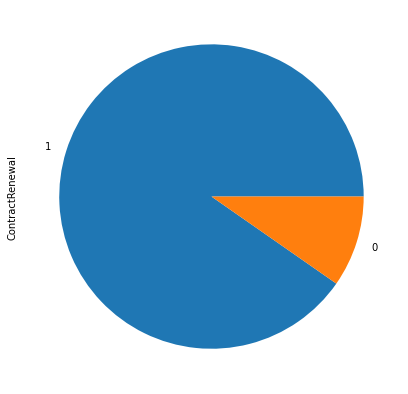

In [17]:
df['ContractRenewal'].value_counts().plot(figsize=(7,7),kind='pie')


<AxesSubplot:ylabel='ContractRenewal'>

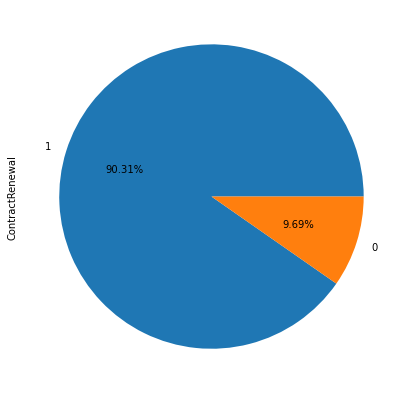

In [18]:
df['ContractRenewal'].value_counts().plot(figsize=(7,7),kind='pie',autopct='%.2f%%')

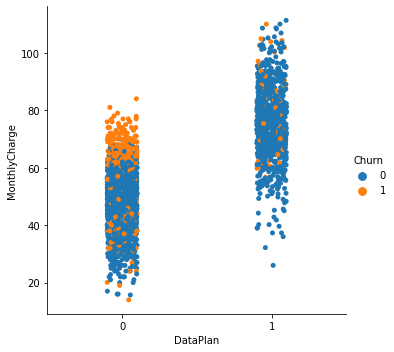

In [19]:
sns.catplot(x="DataPlan", y="MonthlyCharge", hue="Churn", data=df)

In [20]:
df1 = df.loc[df["Churn"]==1] # Churned Customers
df0 = df.loc[df["Churn"]==0] # Existing Customers

# Data Usage vs Monthly Charge

Text(0.5, 1.0, 'Churn=0&1')

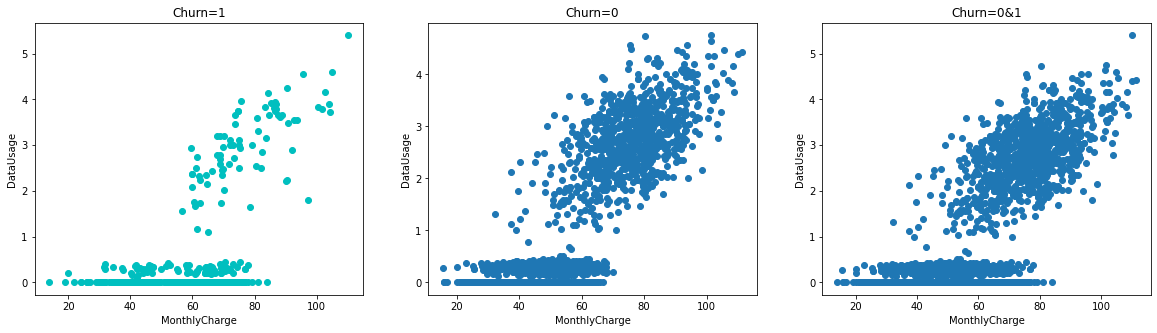

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(df1["MonthlyCharge"], df1["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(df0["MonthlyCharge"], df0["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(df["MonthlyCharge"], df["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

# Customer Segmentation

In [22]:
# Manual Customer Segmentaion
seg1 = df.loc[df["DataUsage"]<=1] # Segment1
seg2 = df.loc[df["DataUsage"]>1] # Segment2

seg11 = seg1.loc[seg1["Churn"]==1] # Churn Customers from Segment1
seg10 = seg1.loc[seg1["Churn"]==0] # Existing Custoemrs from Segment1

seg21 = seg2.loc[seg2["Churn"]==1] # Churned Custoemrs in segment2.
seg20 = seg2.loc[seg2["Churn"]==0] # Existing Custoemrs in segment2.

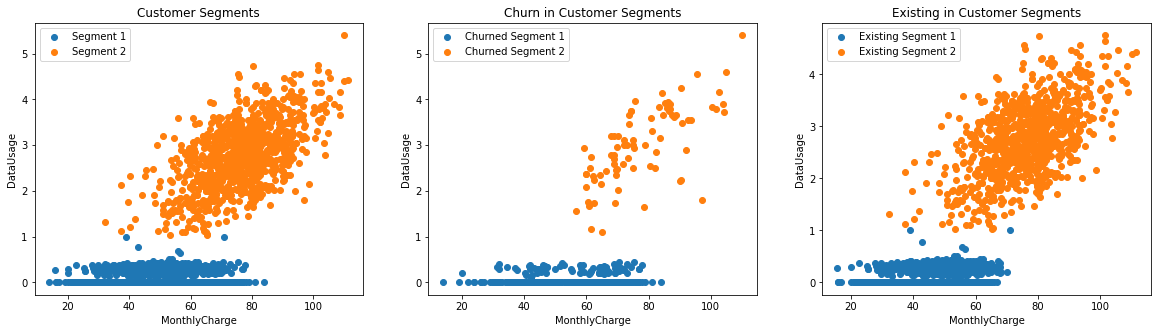

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DataUsage'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DataUsage'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DataUsage'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DataUsage'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DataUsage'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DataUsage'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DataUsage")
plt.legend()

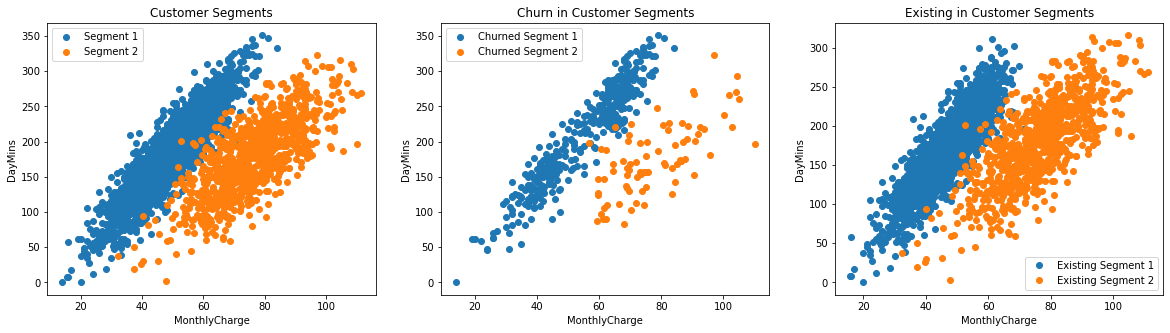

In [24]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg1['MonthlyCharge'], seg1['DayMins'], 'o', label='Segment 1')
plt.plot(seg2['MonthlyCharge'], seg2['DayMins'], 'o', label='Segment 2')
plt.title('Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(132)
plt.plot(seg11['MonthlyCharge'], seg11['DayMins'], 'o', label='Churned Segment 1')
plt.plot(seg21['MonthlyCharge'], seg21['DayMins'], 'o', label='Churned Segment 2')
plt.title('Churn in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

plt.subplot(133)
plt.plot(seg10['MonthlyCharge'], seg10['DayMins'], 'o', label='Existing Segment 1')
plt.plot(seg20['MonthlyCharge'], seg20['DayMins'], 'o', label='Existing Segment 2')
plt.title('Existing in Customer Segments')
plt.xlabel('MonthlyCharge')
plt.ylabel("DayMins")
plt.legend()

Segment 1. Customers who's usage is 0-1.

In [25]:
seg1

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
2         0           137                1         0       0.00   
3         0            84                0         0       0.00   
4         0            75                0         0       0.00   
5         0           118                0         0       0.00   
7         0           147                0         0       0.00   
...     ...           ...              ...       ...        ...   
3326      0            96                1         0       0.36   
3327      0            79                1         0       0.00   
3329      0            68                1         0       0.34   
3330      0            28                1         0       0.00   
3331      0           184                0         0       0.00   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
5                 0    223.4        98           57.0       11.03       6.3  
7                 0    157.0        79           36.0        5.16       7.1  
...             ...      ...       ...            ...         ...       ...  
3326              1    106.6       128           46.6       14.24      14.9  
3327              2    134.7        98           40.0        9.49      11.8  
3329              3    231.1        57           56.4        7.67       9.6  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  

[2420 rows x 11 columns]

In [26]:
# % of customer churn in seg1 
seg1["Churn"].value_counts(normalize=True) * 100

0    83.347107
1    16.652893
Name: Churn, dtype: float64

In [27]:
# % of customer having data plan in seg1 
(seg1["DataPlan"].value_counts(normalize=True) * 100)

0    99.628099
1     0.371901
Name: DataPlan, dtype: float64

In [28]:
# list of customer having data plan in seg1, 9 customers
seg1.loc[seg1["DataPlan"]==1]

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
343       0            98                1         1       0.00   
383       0           117                0         1       1.00   
595       0            87                1         1       0.00   
2906      0            87                1         1       0.00   
3022      0           123                1         1       0.78   
3212      0           144                1         1       1.00   
3216      0           221                1         1       0.65   
3234      0            75                1         1       0.68   
3275      0           120                1         1       0.00   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
343               2     64.6        98           26.0        8.81       0.0  
383               1    196.0        82           71.0       16.14       3.7  
595               1    151.4        95           39.0        7.62       0.0  
2906              1    165.8       122           45.0        9.35       0.0  
3022              0    146.6        87           42.8        5.74       2.9  
3212              0    105.0        86           39.0        6.09       3.7  
3216              0    180.5        85           56.5       11.21       2.4  
3234              1    200.6        96           55.8        8.21       2.5  
3275              1    128.5       115           36.0        8.19       0.0

Text(0.5, 1.0, 'Churn=0&1')

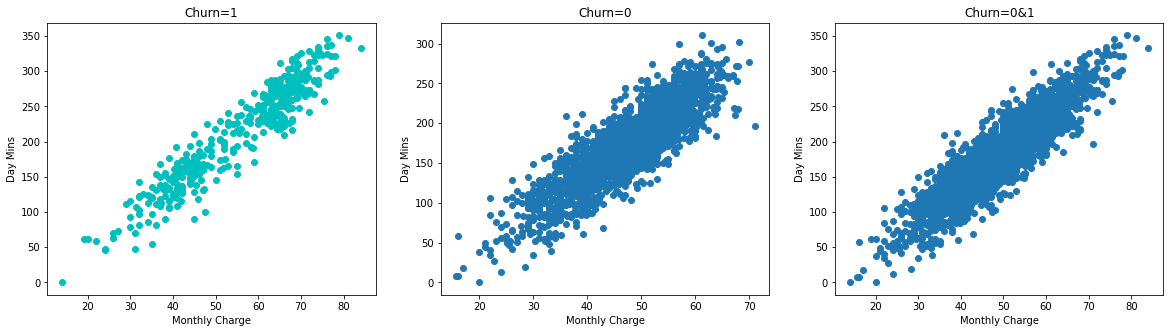

In [29]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DayMins"], "co")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DayMins"], "o")
plt.xlabel("Monthly Charge")
plt.ylabel("Day Mins")
plt.title("Churn=0&1")


Text(0.5, 1.0, 'Churn=0&1')

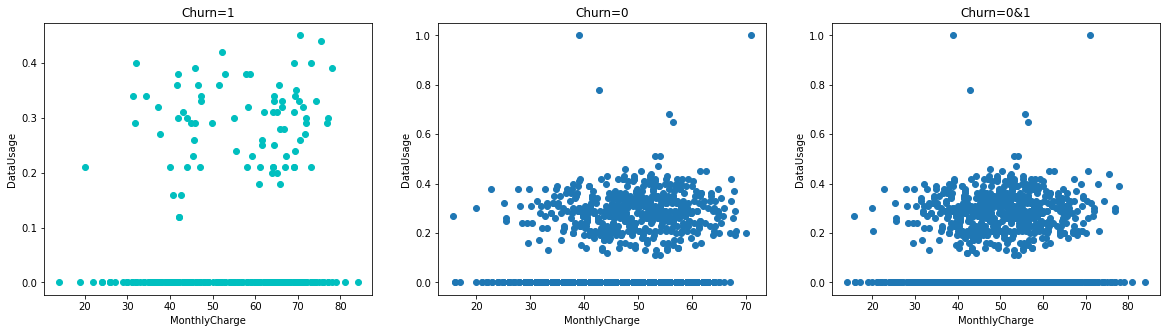

In [30]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg10["MonthlyCharge"], seg10["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

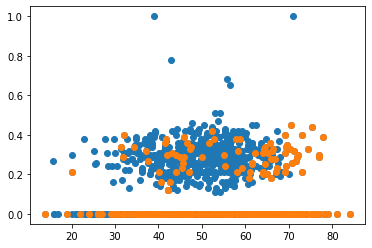

In [31]:
plt.plot(seg1["MonthlyCharge"], seg1["DataUsage"], "o") # All within seg1
plt.plot(seg11["MonthlyCharge"], seg11["DataUsage"], "o") # Churned within seg1

More on zero data usage customers

Text(0.5, 1.0, 'Churn=0&1')

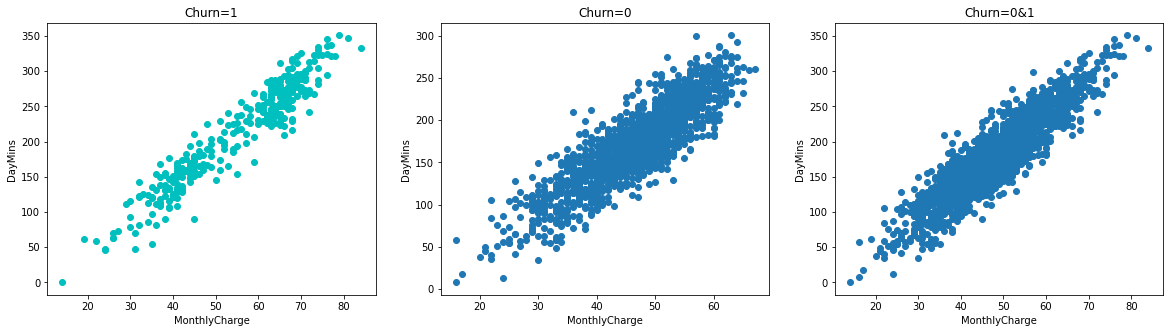

In [32]:
dataus0 = seg1.loc[seg1["DataUsage"]==0] # Customers with Data Usage zero in seg1.

dataus00 = dataus0.loc[dataus0["Churn"]==0] # Existing Customers with Data Usage zero in seg1.
dataus01 = dataus0.loc[dataus0["Churn"]==1] # Churned Customers with Data Usage zero in seg1.

plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(dataus01["MonthlyCharge"], dataus01["DayMins"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(dataus00["MonthlyCharge"], dataus00["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(dataus0["MonthlyCharge"], dataus0["DayMins"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DayMins")
plt.title("Churn=0&1")

In [33]:
dataus0

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
2         0           137                1         0        0.0   
3         0            84                0         0        0.0   
4         0            75                0         0        0.0   
5         0           118                0         0        0.0   
7         0           147                0         0        0.0   
...     ...           ...              ...       ...        ...   
3322      1            62                1         0        0.0   
3324      0           159                1         0        0.0   
3327      0            79                1         0        0.0   
3330      0            28                1         0        0.0   
3331      0           184                0         0        0.0   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
2                 0    243.4       114           52.0        6.06      12.2  
3                 2    299.4        71           57.0        3.10       6.6  
4                 3    166.7       113           41.0        7.42      10.1  
5                 0    223.4        98           57.0       11.03       6.3  
7                 0    157.0        79           36.0        5.16       7.1  
...             ...      ...       ...            ...         ...       ...  
3322              4    321.1       105           78.0       13.28      11.5  
3324              1    169.8       114           46.0        9.89      11.6  
3327              2    134.7        98           40.0        9.49      11.8  
3330              2    180.8       109           56.0       14.44      14.1  
3331              2    213.8       105           50.0        7.98       5.0  

[1813 rows x 11 columns]

In [34]:
# % churn in customers with zero data usage in seg1
dataus0['Churn'].value_counts(normalize=True) * 100

0    82.239382
1    17.760618
Name: Churn, dtype: float64

Data users within segemet 1

In [35]:
dataus = seg1.loc[seg1["DataUsage"]>0]
dataus

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
8         0           117                1         0       0.19   
10        1            65                1         0       0.29   
11        0            74                1         0       0.34   
13        0            95                1         0       0.44   
20        0           147                1         0       0.31   
...     ...           ...              ...       ...        ...   
3320      1           122                0         0       0.30   
3323      1           117                1         0       0.39   
3325      0            78                1         0       0.23   
3326      0            96                1         0       0.36   
3329      0            68                1         0       0.34   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
8                 1    184.5        97           63.9       17.58       8.7  
10                4    129.1       137           44.9       11.43      12.7  
11                0    187.7       127           49.4        8.17       9.1  
13                3    156.6        88           52.4       12.38      12.3  
20                0    155.1       117           50.1       11.99      10.6  
...             ...      ...       ...            ...         ...       ...  
3320              4    140.0       101           44.0        9.82       9.7  
3323              5    118.4       126           45.9       12.47      13.6  
3325              2    193.4        99           45.3        5.85       9.3  
3326              1    106.6       128           46.6       14.24      14.9  
3329              3    231.1        57           56.4        7.67       9.6  

[607 rows x 11 columns]

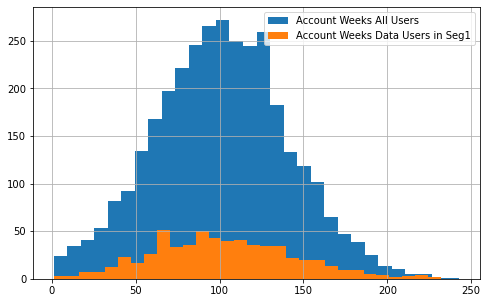

In [36]:
plt.figure(figsize=(8,5))
df["AccountWeeks"].hist(bins=30, label='Account Weeks All Users')
dataus["AccountWeeks"].hist(bins=30, label='Account Weeks Data Users in Seg1')
plt.legend()

In [37]:
# % Churn in Custoemrs with data usege in seg1
dataus["Churn"].value_counts(normalize=True) * 100

0    86.655684
1    13.344316
Name: Churn, dtype: float64

Segment 2. Customers who's data usage is >1

In [38]:
seg2

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  \
0         0           128                1         1       2.70   
1         0           107                1         1       3.70   
6         0           121                1         1       2.03   
9         0           141                0         1       3.02   
16        0            85                1         1       3.73   
...     ...           ...              ...       ...        ...   
3306      0           106                1         1       2.19   
3315      0           149                1         1       1.76   
3316      0           103                1         1       3.32   
3328      0           192                1         1       2.67   
3332      0            74                1         1       3.70   

      CustServCalls  DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0                 1    265.1       110           89.0        9.87      10.0  
1                 1    161.6       123           82.0        9.78      13.7  
6                 3    218.2        88           87.3       17.43       7.5  
9                 0    258.6        84           93.2       11.10      11.2  
16                1    196.4       139           95.3       14.05      13.8  
...             ...      ...       ...            ...         ...       ...  
3306              1     83.6       131           53.9       10.20       8.1  
3315              0    148.5       106           52.6        5.73       6.5  
3316              0    164.1       111           80.2       10.96      12.3  
3328              2    156.2        77           71.7       10.78       9.9  
3332              0    234.4       113          100.0       13.30      13.7  

[913 rows x 11 columns]

In [39]:
# % Churn in seg2.
seg2["Churn"].value_counts(normalize=True) * 100

0    91.237678
1     8.762322
Name: Churn, dtype: float64

In [40]:
# Every customers has data plan in seg2
seg2["DataPlan"].value_counts()

1    913
Name: DataPlan, dtype: int64

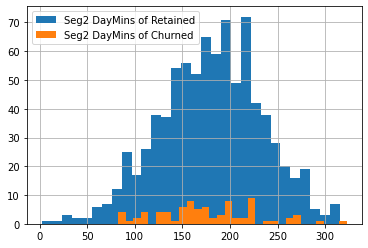

In [41]:
seg20["DayMins"].hist(bins=30, label='Seg2 DayMins of Retained') 
seg21["DayMins"].hist(bins=30, label='Seg2 DayMins of Churned') 
plt.legend()

Segment 2 Data Usage


Text(0.5, 1.0, 'Churn=0&1')

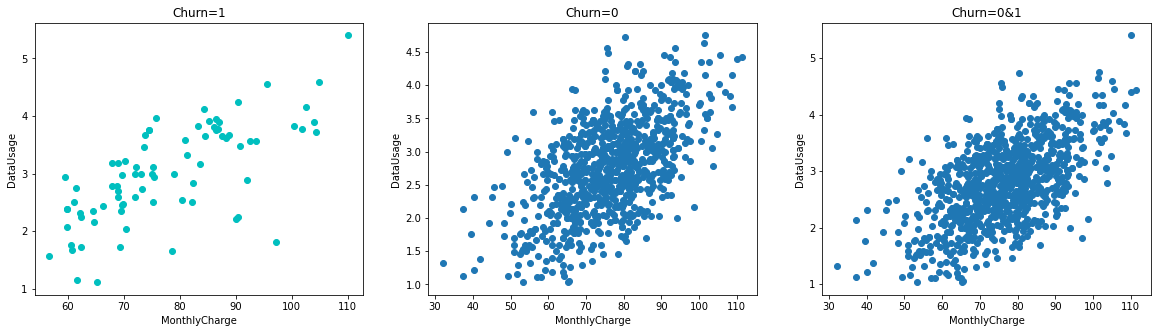

In [42]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "co")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=1")

plt.subplot(132)
plt.plot(seg20["MonthlyCharge"], seg20["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0")

plt.subplot(133)
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.xlabel("MonthlyCharge")
plt.ylabel("DataUsage")
plt.title("Churn=0&1")

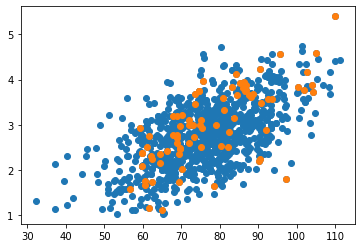

In [43]:
plt.plot(seg2["MonthlyCharge"], seg2["DataUsage"], "o")
plt.plot(seg21["MonthlyCharge"], seg21["DataUsage"], "o")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

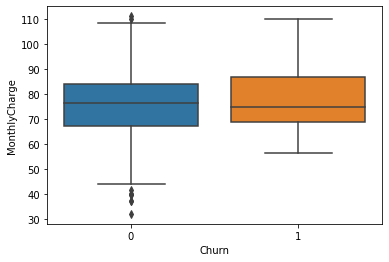

In [44]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

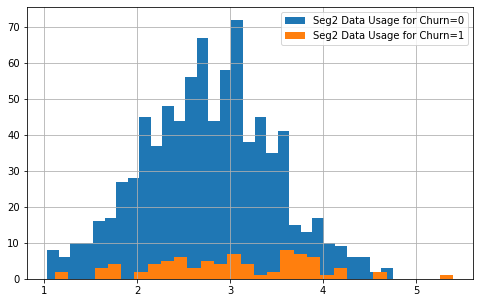

In [45]:
plt.figure(figsize=(8,5))
seg20["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=0')
seg21["DataUsage"].hist(bins=30, label='Seg2 Data Usage for Churn=1') 
plt.legend()

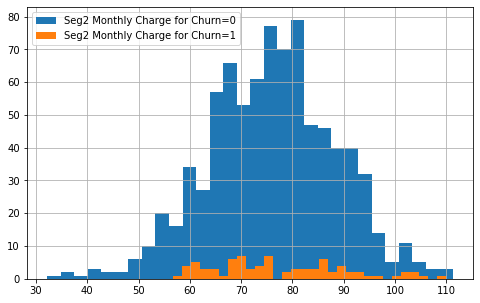

In [46]:
plt.figure(figsize=(8,5))
seg20["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=0') 
seg21["MonthlyCharge"].hist(bins=30, label='Seg2 Monthly Charge for Churn=1') 
plt.legend()

Seg 1 & Seg2 DayMins

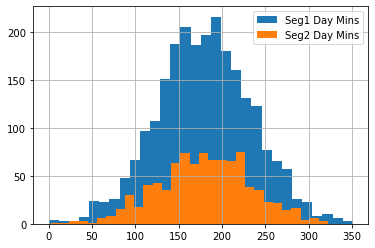

In [47]:
seg1['DayMins'].hist(bins=30, label='Seg1 Day Mins')
seg2['DayMins'].hist(bins=30, label='Seg2 Day Mins')
plt.legend()

In [48]:
seg1['DayMins'].mean()

179.71632231404982

In [49]:
seg2['DayMins'].mean()

179.930887185104

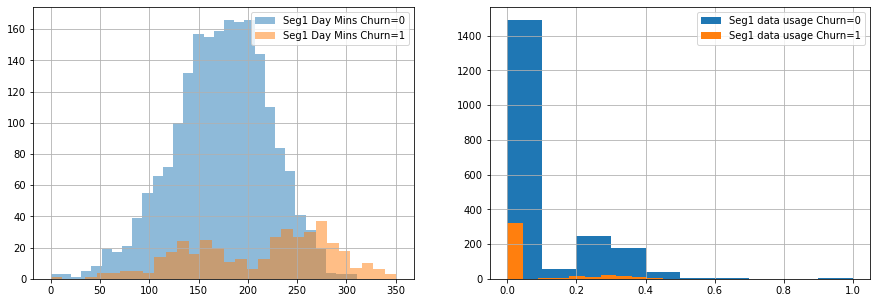

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(121)
seg10["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=0')
seg11["DayMins"].hist(bins=30, alpha=0.5, label='Seg1 Day Mins Churn=1')
plt.legend()

plt.subplot(122)
seg10["DataUsage"].hist(label='Seg1 data usage Churn=0')
seg11["DataUsage"].hist(label='Seg1 data usage Churn=1')
plt.legend()

Seg1 & Seg2 Monthly Charges


<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

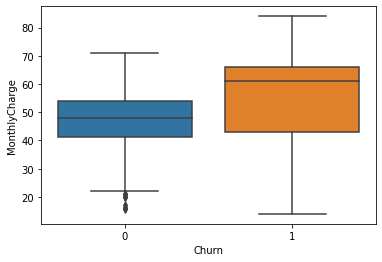

In [51]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg1)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharge'>

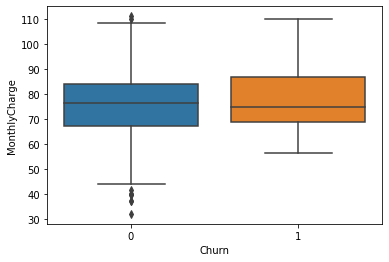

In [52]:
sns.boxplot(x="Churn", y="MonthlyCharge", data=seg2)

Customer Service Calls

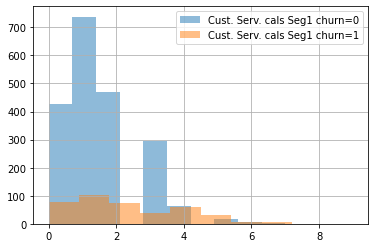

In [53]:
seg10["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=0')
seg11["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg1 churn=1')
plt.legend()

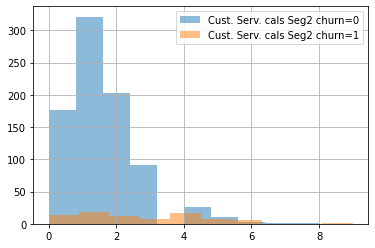

In [54]:
seg20["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=0')
seg21["CustServCalls"].hist(alpha=0.5, label='Cust. Serv. cals Seg2 churn=1')
plt.legend()

Contract Renewal

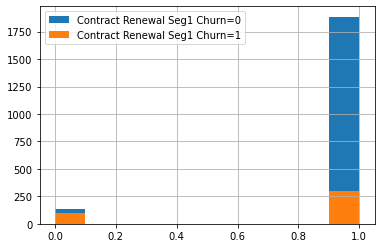

In [55]:
seg10["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=0') 
seg11["ContractRenewal"].hist(label='Contract Renewal Seg1 Churn=1')
plt.legend()

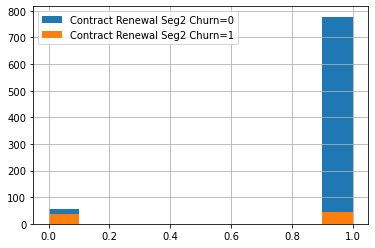

In [56]:
seg20["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=0')
seg21["ContractRenewal"].hist(label='Contract Renewal Seg2 Churn=1')
plt.legend()

Steps to Retain Customers


# Hypothesis Test


Null Hypothesis: Which customers are using data without subscribing to data plan are more prone to
churn.

Alternate Hypothesis: Which customers are using data without subscribing to data plan are not prone to
churn.

# PERMUTATIONS

* In this test random sample of 20 customers will be taken.
* That 20 customers will be in two groups.
* Group2: Customers which are using data without subscribing data plan.
* Group1: All remaining Customers which are not in Group2.
* Find the churn ratio in both groups.

In [57]:
# 1000 Permutations
# churn in only customers using data without dataplan 

population_churn = []   # Remaining customers (not in Group2) churn % in sample (Group 1)
no_data_plan_churn = []   # Churn % in data users, without data plan (Group 2)

for i in range(0,1000):
  sample = df.sample(n=20)
  sample_churn = sample.loc[~(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  sample_churn_data_plan = sample.loc[(sample['DataPlan']==0)&(sample['DataUsage']>0)]['Churn'].value_counts(normalize=True)
  population_churn.append(sample_churn)
  no_data_plan_churn.append(sample_churn_data_plan)

In [58]:
population_churn = pd.DataFrame(population_churn)
no_data_plan_churn = pd.DataFrame(no_data_plan_churn)

The means of samples are significanly diffrent

In [59]:
population_churn[1].mean()

0.22664835906814557

In [60]:
no_data_plan_churn[1].mean()

0.3461340012758453

Distplot shows lower density than next plot means a null hypothesis is going right

<AxesSubplot:xlabel='1', ylabel='Density'>

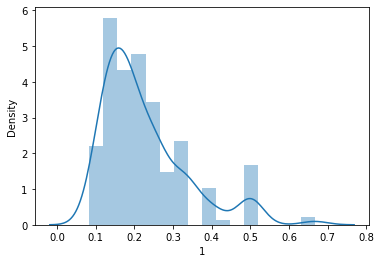

In [61]:
sns.distplot(population_churn[1])

Distplot shows higher density than the previous plot means a null hypothesis is going right.

<AxesSubplot:xlabel='1', ylabel='Density'>

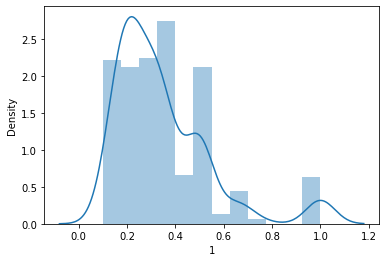

In [62]:
sns.distplot(no_data_plan_churn[1])

In [63]:
permutation_results = pd.concat([population_churn, no_data_plan_churn], axis=1, ignore_index=True)
permutation_results.reset_index(drop=True, inplace=True)

In [64]:
dff = permutation_results
dff.fillna(0, inplace=True)
dff['Result'] = dff[3] - dff[1]
dff

0         1         2         3    Result
0    1.000000  0.000000  0.750000  0.250000  0.250000
1    1.000000  0.000000  1.000000  0.000000  0.000000
2    1.000000  0.000000  0.666667  0.333333  0.333333
3    0.666667  0.333333  0.800000  0.200000 -0.133333
4    0.857143  0.142857  1.000000  0.000000 -0.142857
..        ...       ...       ...       ...       ...
995  1.000000  0.000000  0.333333  0.666667  0.666667
996  1.000000  0.000000  0.500000  0.500000  0.500000
997  1.000000  0.000000  0.714286  0.285714  0.285714
998  0.875000  0.125000  1.000000  0.000000 -0.125000
999  1.000000  0.000000  1.000000  0.000000  0.000000

[1000 rows x 5 columns]

In [65]:
len(dff.loc[dff['Result']>=0]) * 100 / len(dff)


74.6

In [66]:
len(dff.loc[dff['Result']<0]) * 100 / len(dff)


25.4

*  ~70% of experiments are in favor of the null hypothesis.
* Null hypothesis accepted.
* All conclusions on customer analysis are going right.

# Machine Learning Model


Random Under-Sampling


In [67]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [68]:
# Random under-sampleing
df2 = df.loc[df['Churn']==0].sample(n=483).copy()

# All Churned Customers
df3 = df.loc[df['Churn']==1].copy()

# Concat all customers, with new index on raws
df4 = pd.concat([df2,df3], ignore_index=True)

# Shuffle raws randomly
df4 = df4.sample(frac=1)

# Reset index of every raws
df4.reset_index(drop=True, inplace=True)
df4

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0        0            70                1         0       0.00              1   
1        1           111                1         0       0.00              4   
2        1            60                0         0       0.00              0   
3        1           100                1         0       0.32              0   
4        1            85                1         0       0.00              5   
..     ...           ...              ...       ...        ...            ...   
961      1           161                1         0       0.00              4   
962      1           155                1         0       0.00              0   
963      0            65                1         0       0.00              2   
964      1            21                1         0       0.00              5   
965      0            45                1         0       0.00              1   

     DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0      129.9       102           40.0       10.44      14.3  
1      172.8        58           45.0        9.16       7.9  
2      205.9        97           59.0       13.87      11.0  
3      278.0        76           66.2        8.84       8.3  
4      165.8        96           45.0        9.50      10.9  
..       ...       ...            ...         ...       ...  
961    332.9        67           84.0       15.89       5.4  
962    203.4       100           51.0        9.55       8.9  
963    153.9       117           45.0       11.01       8.5  
964     92.6        95           30.0        8.10      11.3  
965    142.4       107           52.0       15.94      11.1  

[966 rows x 11 columns]

# EDA

In [69]:
df4

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0        0            70                1         0       0.00              1   
1        1           111                1         0       0.00              4   
2        1            60                0         0       0.00              0   
3        1           100                1         0       0.32              0   
4        1            85                1         0       0.00              5   
..     ...           ...              ...       ...        ...            ...   
961      1           161                1         0       0.00              4   
962      1           155                1         0       0.00              0   
963      0            65                1         0       0.00              2   
964      1            21                1         0       0.00              5   
965      0            45                1         0       0.00              1   

     DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0      129.9       102           40.0       10.44      14.3  
1      172.8        58           45.0        9.16       7.9  
2      205.9        97           59.0       13.87      11.0  
3      278.0        76           66.2        8.84       8.3  
4      165.8        96           45.0        9.50      10.9  
..       ...       ...            ...         ...       ...  
961    332.9        67           84.0       15.89       5.4  
962    203.4       100           51.0        9.55       8.9  
963    153.9       117           45.0       11.01       8.5  
964     92.6        95           30.0        8.10      11.3  
965    142.4       107           52.0       15.94      11.1  

[966 rows x 11 columns]

<AxesSubplot:>

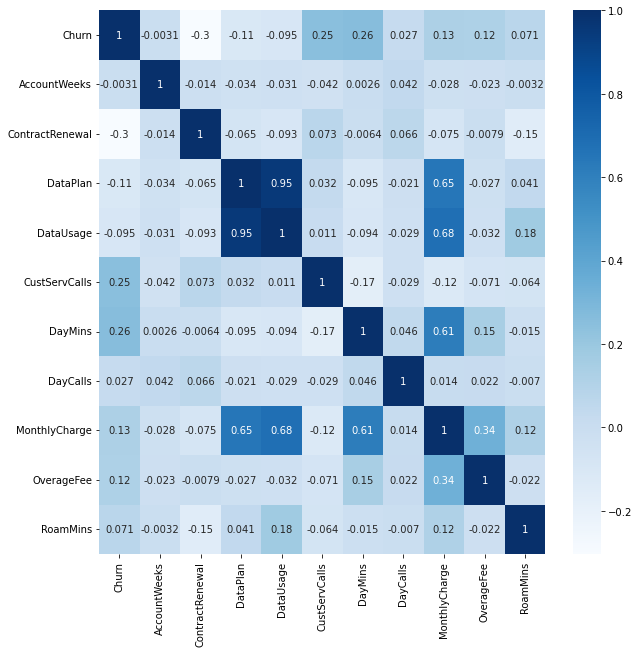

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df4.corr(), annot=True, cmap='Blues')

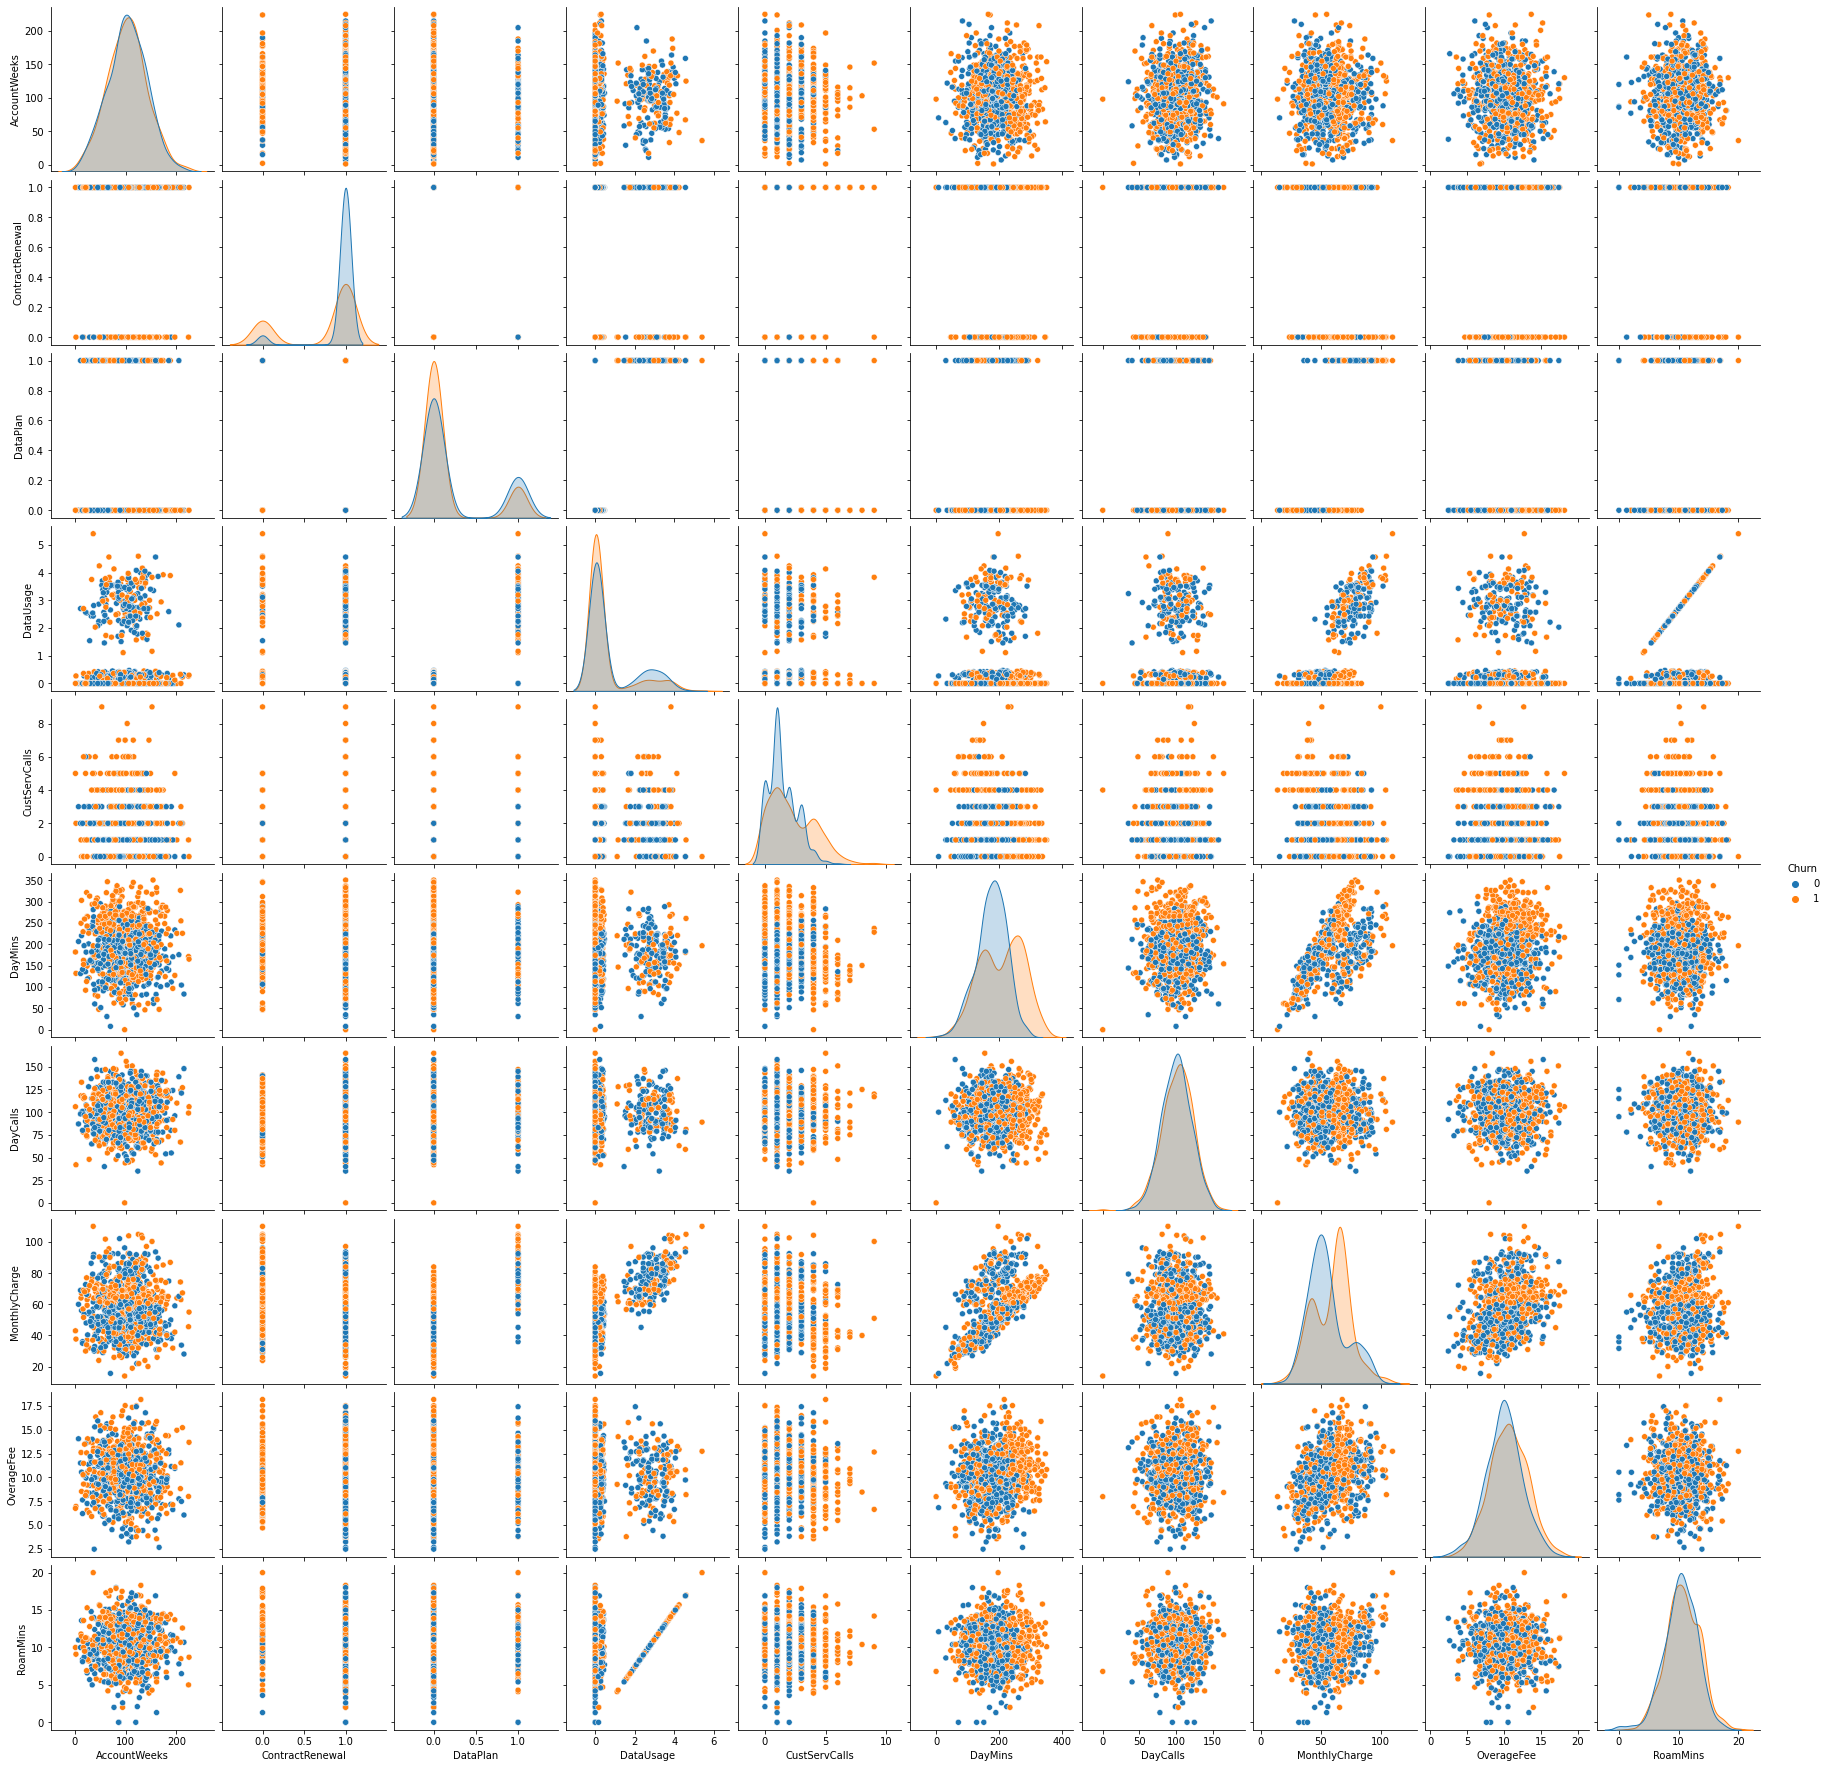

In [71]:
sns.pairplot(df4, hue='Churn')

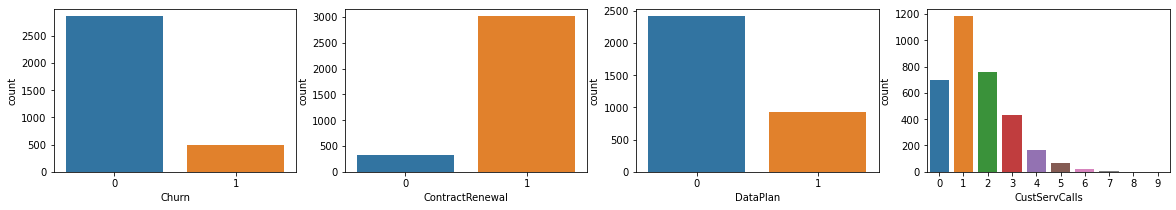

In [72]:
fig,axs=plt.subplots(figsize=(20,3),ncols=4)
sns.countplot(x=df['Churn'],ax=axs[0])
sns.countplot(x=df['ContractRenewal'],ax=axs[1])
sns.countplot(x=df['DataPlan'],ax=axs[2])
sns.countplot(x=df['CustServCalls'],ax=axs[3])
plt.show()

In [73]:
df4.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [74]:
X = df4.drop("Churn", axis=1)
y = df4["Churn"]

In [75]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33,random_state=42)

In [76]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    tr=model.score(xtrain,ytrain)
    te=model.score(xtest,ytest)
    
    print(f"Training accuracy : {tr}\nTesting accuracy : {te}")
    
    print("Classification Report : \n",classification_report(ytest,ypred))
    
    return model


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [78]:
knn=mymodel(KNeighborsClassifier())

Training accuracy : 0.7434312210200927
Testing accuracy : 0.6112852664576802
Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.69      0.64       163
           1       0.62      0.53      0.57       156

    accuracy                           0.61       319
   macro avg       0.61      0.61      0.61       319
weighted avg       0.61      0.61      0.61       319



In [79]:
knn=mymodel(KNeighborsClassifier())

Training accuracy : 0.7434312210200927
Testing accuracy : 0.6112852664576802
Classification Report : 
               precision    recall  f1-score   support

           0       0.61      0.69      0.64       163
           1       0.62      0.53      0.57       156

    accuracy                           0.61       319
   macro avg       0.61      0.61      0.61       319
weighted avg       0.61      0.61      0.61       319



In [80]:
knn=mymodel(LogisticRegression())

Training accuracy : 0.7666151468315301
Testing accuracy : 0.7554858934169278
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       163
           1       0.74      0.76      0.75       156

    accuracy                           0.76       319
   macro avg       0.76      0.76      0.76       319
weighted avg       0.76      0.76      0.76       319



In [81]:
knn=mymodel(DecisionTreeClassifier())

Training accuracy : 1.0
Testing accuracy : 0.7304075235109718
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       163
           1       0.71      0.77      0.74       156

    accuracy                           0.73       319
   macro avg       0.73      0.73      0.73       319
weighted avg       0.73      0.73      0.73       319



In [82]:
svc=mymodel(SVC())

Training accuracy : 0.6445131375579598
Testing accuracy : 0.6614420062695925
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.89      0.73       163
           1       0.79      0.42      0.55       156

    accuracy                           0.66       319
   macro avg       0.70      0.66      0.64       319
weighted avg       0.70      0.66      0.64       319



In [83]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

In [84]:
knn=mymodel(KNeighborsClassifier())

Training accuracy : 0.8794435857805255
Testing accuracy : 0.7962382445141066
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       163
           1       0.79      0.79      0.79       156

    accuracy                           0.80       319
   macro avg       0.80      0.80      0.80       319
weighted avg       0.80      0.80      0.80       319



In [85]:
knn=mymodel(LogisticRegression())

Training accuracy : 0.7712519319938176
Testing accuracy : 0.7617554858934169
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.76      0.77       163
           1       0.75      0.76      0.76       156

    accuracy                           0.76       319
   macro avg       0.76      0.76      0.76       319
weighted avg       0.76      0.76      0.76       319



In [86]:
knn=mymodel(DecisionTreeClassifier())

Training accuracy : 1.0
Testing accuracy : 0.7460815047021944
Classification Report : 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       163
           1       0.72      0.78      0.75       156

    accuracy                           0.75       319
   macro avg       0.75      0.75      0.75       319
weighted avg       0.75      0.75      0.75       319



In [87]:
parameters={
    "criterion":["gini", "entropy"],
    "max_depth":list (range(1,20)),
    "min_samples_leaf":list (range(1,20))
    
}

In [88]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV (DecisionTreeClassifier(), parameters, verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=11, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.0s
[CV] END criterion

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=12; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=13; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=19; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=19; total time=   0.0s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [89]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 11}

In [90]:
grid.best_score_

0.848550983899821

In [91]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=11)

In [92]:
dt=mymodel(grid.best_estimator_)

# training accuracy is high than testing it is a overfitiing

Training accuracy : 0.874806800618238
Testing accuracy : 0.8150470219435737
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       163
           1       0.83      0.78      0.81       156

    accuracy                           0.82       319
   macro avg       0.82      0.81      0.81       319
weighted avg       0.82      0.82      0.81       319



In [93]:
p1 = knn.predict_proba(xtest)
p2 = knn.predict_proba(xtest)
p3 = knn.predict_proba(xtest)
p4 = knn.predict_proba(xtest)

In [94]:
auc_score1 = roc_auc_score(ytest, p1[:,1])
auc_score2 = roc_auc_score(ytest, p2[:,1])
auc_score3 = roc_auc_score(ytest, p3[:,1])
auc_score4 = roc_auc_score(ytest, p4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.7468538618845367 0.7468538618845367 0.7468538618845367 0.7468538618845367


In [95]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(ytest, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(ytest, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(ytest, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

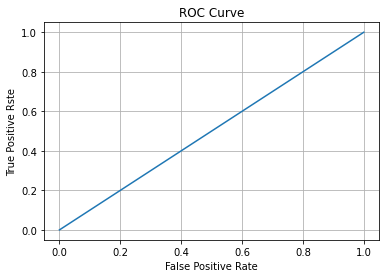

In [96]:
from sklearn.metrics import roc_curve

fpr,tpr,thres=roc_curve(ytest,random_probs, pos_label=1)

plt.plot(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rste")


plt.grid()
plt.show()